# Package Download

In [2]:
list.of.packages <- c("rTensor", "nnTensor", "iTensor",
    "einsum", "RColorBrewer", "fields")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)){
    install.packages(new.packages,
        repos="https://cloud.r-project.org/", type="source")
}

# Package Loading

In [3]:
library("rTensor")
library("nnTensor")
library("iTensor")
library("einsum")
library("RColorBrewer")
library("fields")

Warning message in system2("/usr/bin/otool", c("-L", shQuote(DSO)), stdout = TRUE):
“ 命令 ''/usr/bin/otool' -L '/Users/tsuyusakikouki/opt/anaconda3/envs/r-4.1/lib/R/library/tcltk/libs//tcltk.so'' の実行は状態 1 を持ちました ”
 要求されたパッケージ spam をロード中です 

Spam version 2.8-0 (2022-01-05) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.


 次のパッケージを付け加えます: ‘spam’ 


 以下のオブジェクトは ‘package:base’ からマスクされています: 

     backsolve, forwardsolve 


 要求されたパッケージ viridis をロード中です 

 要求されたパッケージ viridisLite をロード中です 


Try help(fields) to get started.



# Data Download

In [4]:
facedata <- load_orl()
str(facedata)

Formal class 'Tensor' [package ".GlobalEnv"] with 3 slots
  ..@ num_modes: int 4
  ..@ modes    : int [1:4] 92 112 40 10
  ..@ data     : num [1:92, 1:112, 1:40, 1:10] 0.2 0.2 0.2 0.176 0.204 ...


# Plot data (1st angle)

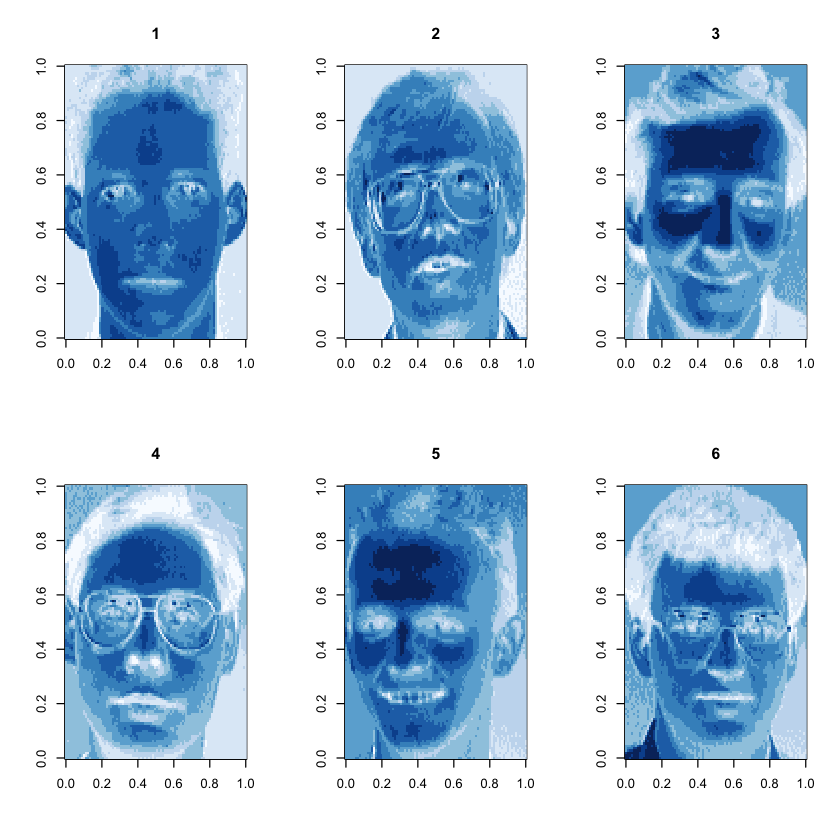

In [7]:
colvec <- brewer.pal(9, "Blues")
layout(rbind(1:3, 4:6))
layout(rbind(1:3, 4:6))
for(i in seq(6)){
    image(facedata@data[,,i,1], col=colvec, main=i)
}

# Plot data (2nd angle)

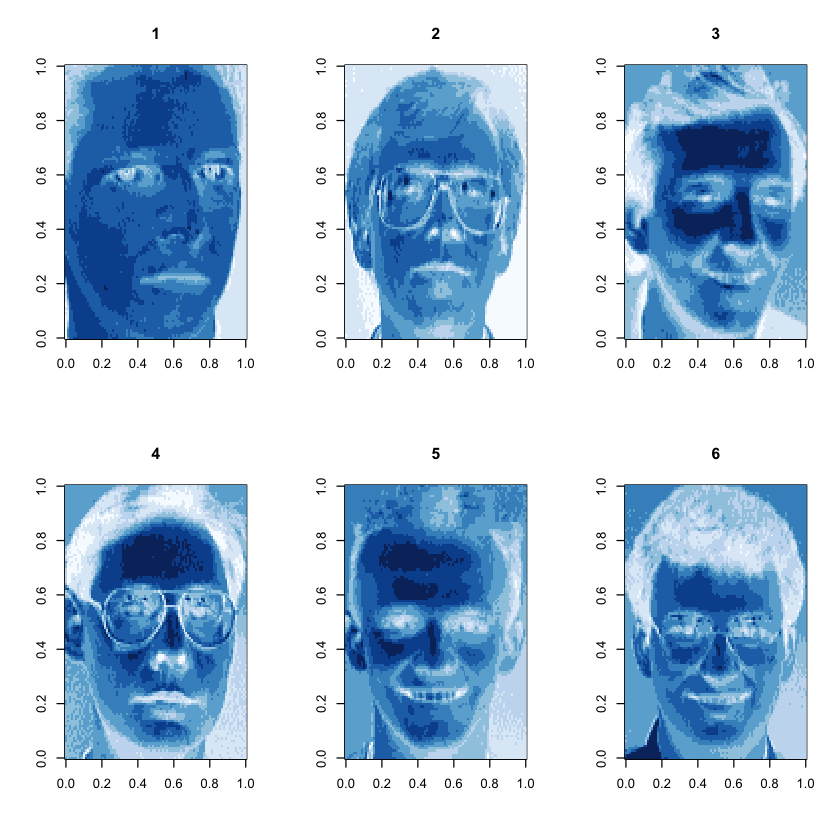

In [14]:
layout(rbind(1:3, 4:6))
for(i in seq(6)){
    image(facedata@data[,,i,2], col=colvec, main=i)
}

# Use 1st Slice (matrix)

In [12]:
matdata <- cs_unfold(facedata[,,,1], m=3)@data

# Average Face

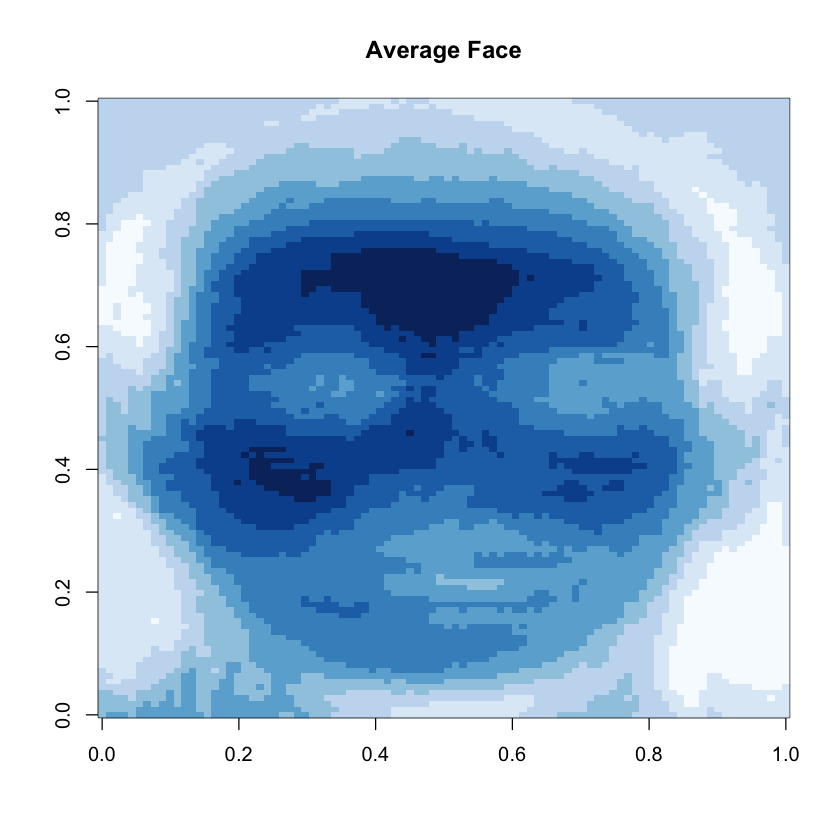

In [15]:
average_face <- rowMeans(matdata)
dim(average_face) <- c(92, 112)
image(average_face, col=colvec, main="Average Face")

# PCA

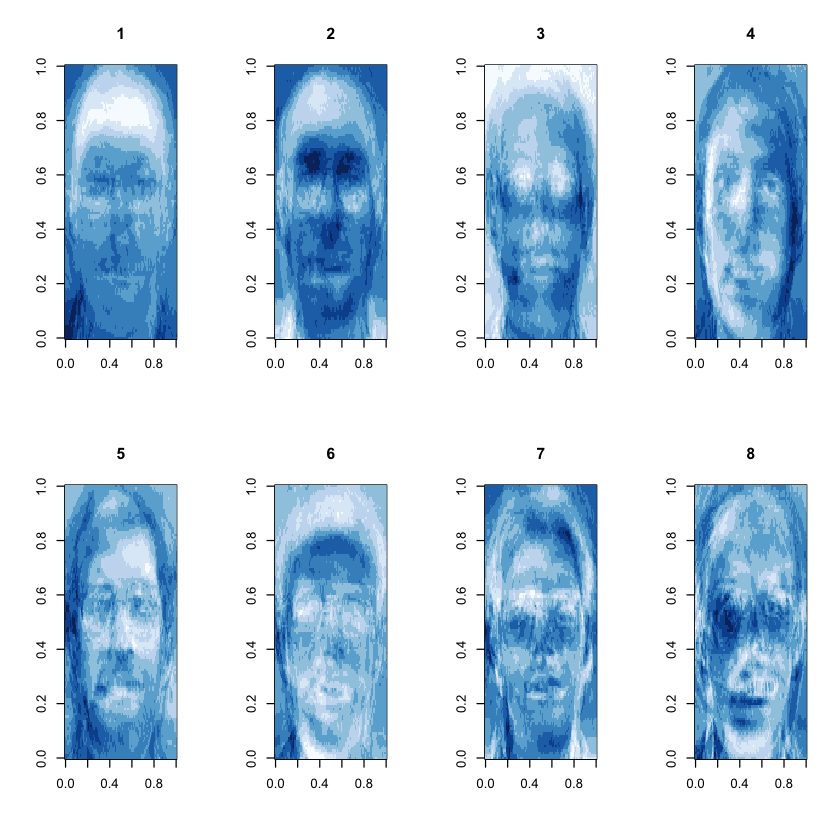

In [19]:
res_pca <- prcomp(t(matdata), center=TRUE, scale=FALSE)

layout(rbind(1:4, 5:8))
for(i in seq(8)){
    score_pca <- as.matrix(res_pca$rotation[,i])
    dim(score_pca) <- c(92, 112)
    image(score_pca, col=colvec, main=i)
}

# SVD

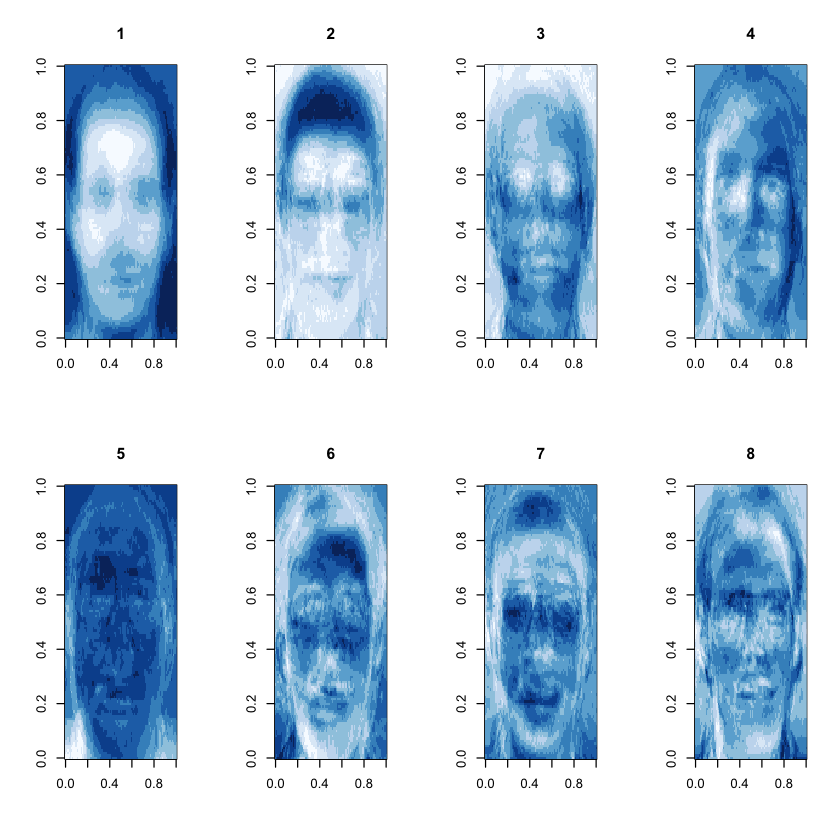

In [20]:
res_svd <- svd(matdata)

layout(rbind(1:4, 5:8))
for(i in seq(8)){
    score_svd <- as.matrix(res_svd$u[,i])
    dim(score_svd) <- c(92, 112)
    image(score_svd, col=colvec, main=i)
}

# NMF

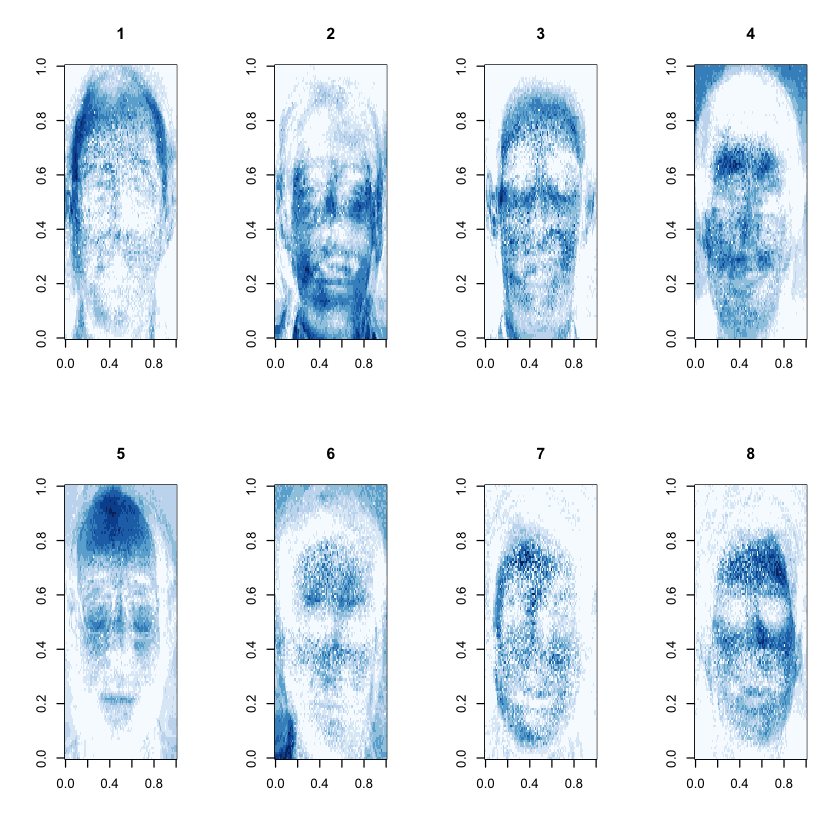

In [22]:
res_nmf <- NMF(matdata,  J=8)

layout(rbind(1:4, 5:8))
for(i in seq(8)){
    score_nmf <- res_nmf$U[,i]
    dim(score_nmf) <- c(92, 112)
    image(score_nmf, col=colvec, main=i)
}

# ICA

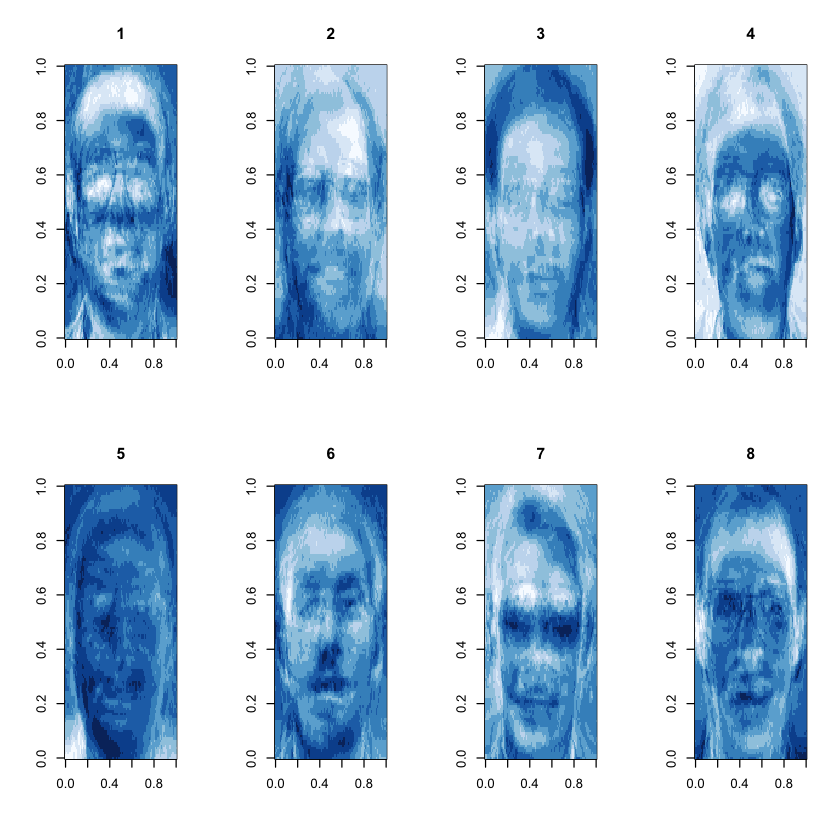

In [25]:
res_ica <- ICA(matdata, J=8)

layout(rbind(1:4, 5:8))
for(i in seq(8)){
    score_ica <- res_ica$S[, i]
    dim(score_ica) <- c(92, 112)
    image(score_ica, col=colvec, main=i)
}

# CP (Tensor Decomposition)

  |======================================================================| 100%


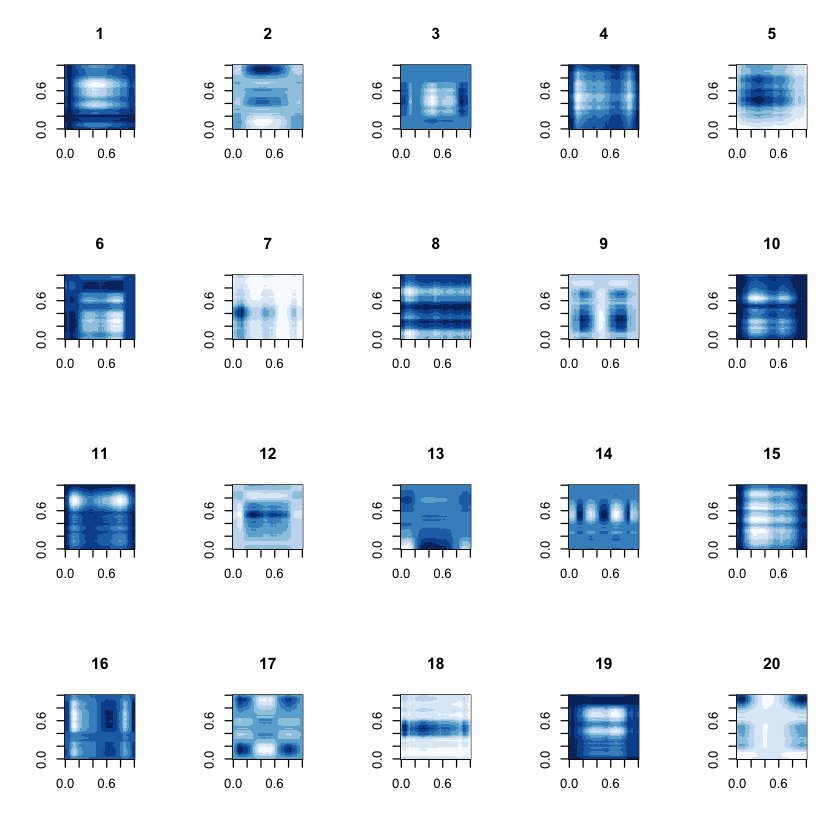

In [26]:
res_cp <- cp(facedata[,,,1], 42)

layout(rbind(1:5, 6:10, 11:15, 16:20))
for(i in seq(20)){
    score_cp <- outer(res_cp$U[[1]][, i], res_cp$U[[2]][, i])
    image(score_cp, col=colvec, main=i)
}

## Reconstructed Tensor (CP)

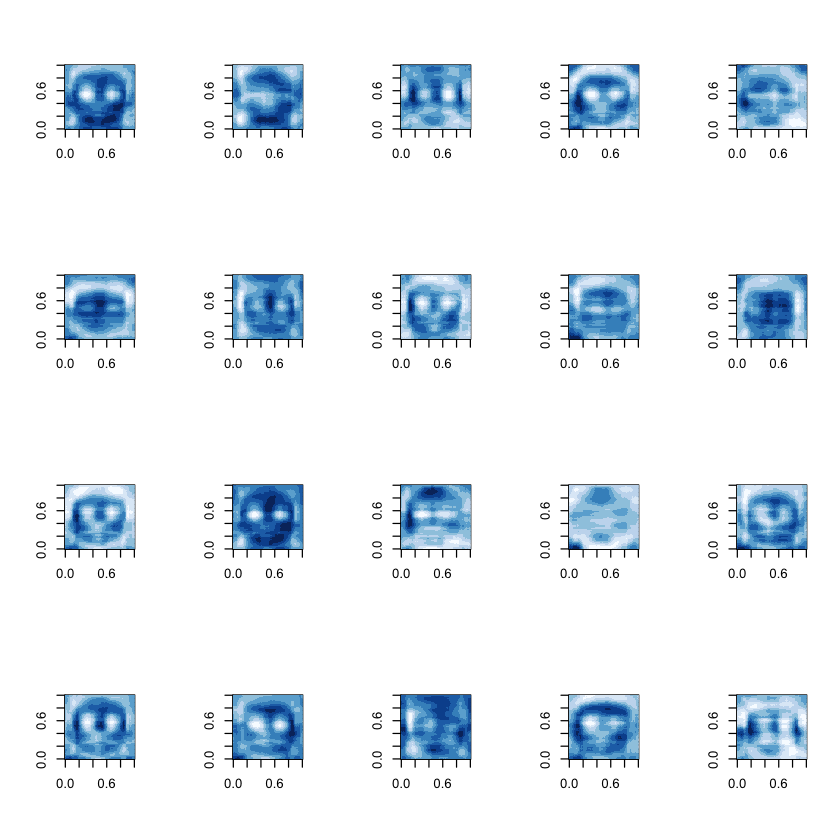

In [27]:
rec_cp <- einsum('il,jl,kl->ijk',
    res_cp$U[[1]], res_cp$U[[2]], res_cp$U[[3]])
layout(rbind(1:5, 6:10, 11:15, 16:20))
for(i in seq(20)){
    image(rec_cp[,,i], col=colvec)
}

# Tucker/HOOI (Tensor Decomposition)

  |======================================================================| 100%


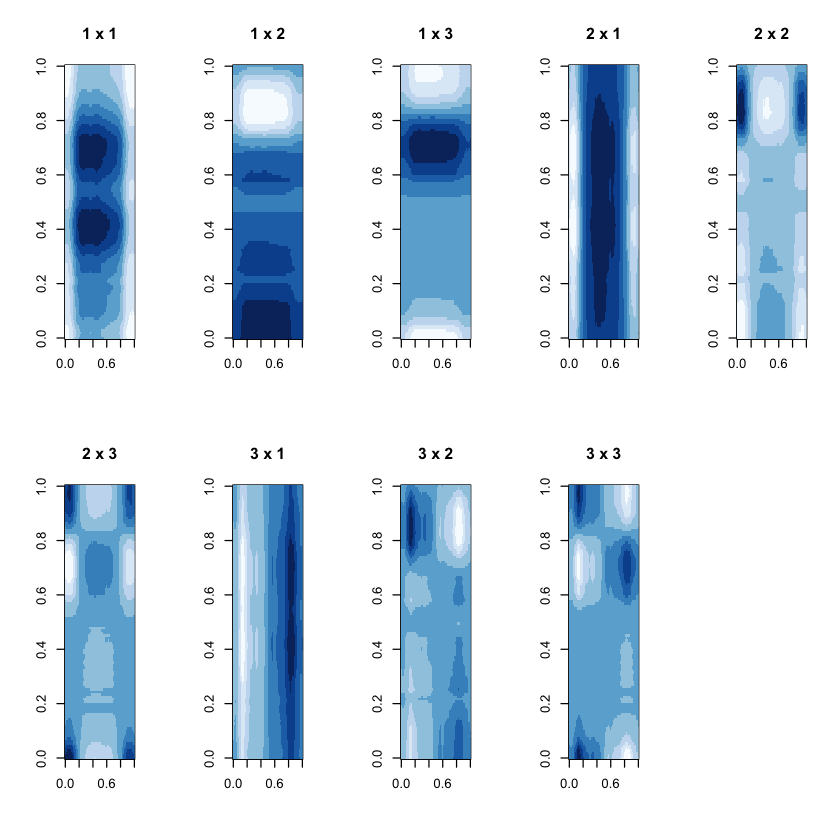

In [28]:
res_tucker <- tucker(facedata[,,,1], c(3,3,10))

layout(rbind(1:5, 6:10))
for(i in seq(3)){
    for(j in seq(3)){
        score_tucker <- outer(res_tucker$U[[1]][, i], res_tucker$U[[2]][, j])
        image(score_tucker, col=colvec, main=paste0(i, " x ", j))
    }
}

## Reconstructed Tensor (Tucker)

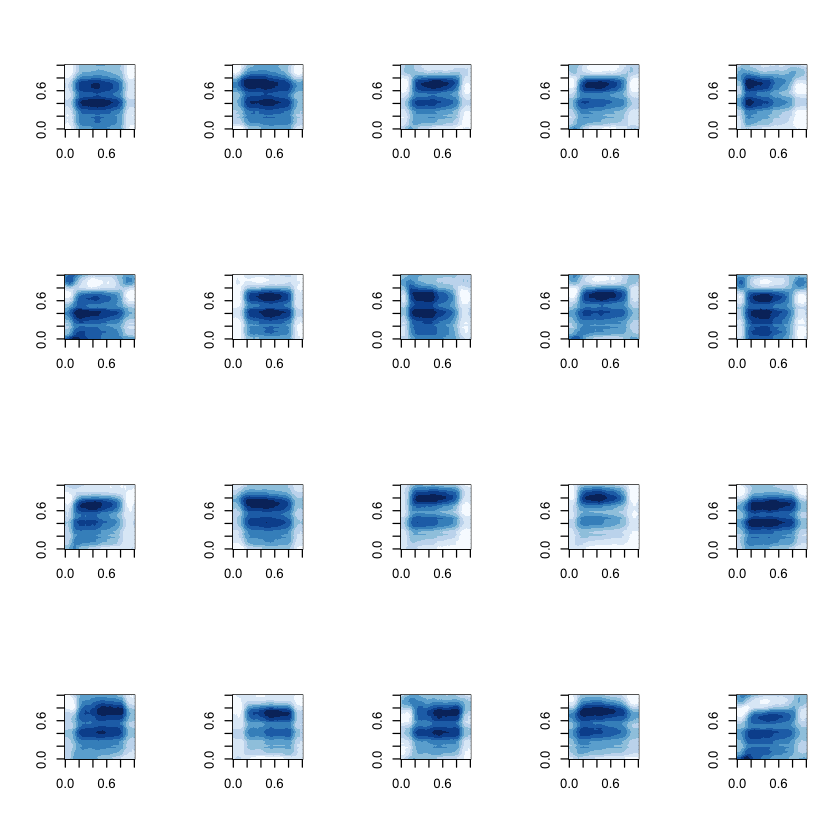

In [29]:
rec_tucker <- recTensor(res_tucker$Z, res_tucker$U, reverse=TRUE)@data
layout(rbind(1:5, 6:10, 11:15, 16:20))
for(i in seq(20)){
    image(rec_tucker[,,i], col=colvec)
}

# Session Information

In [30]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS/LAPACK: /Users/tsuyusakikouki/opt/anaconda3/envs/r-4.1/lib/libopenblasp-r0.3.15.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] fields_14.0        viridis_0.6.2      viridisLite_0.4.0  spam_2.8-0        
[5] RColorBrewer_1.1-3 einsum_0.1.0       iTensor_0.99.0     nnTensor_1.1.8    
[9] rTensor_1.4.8     

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.8.3     pillar_1.7.0     compiler_4.1.0   base64enc_0.1-3 
 [5] tools_4.1.0      dotCall64_1.0-1  digest_0.6.29    uuid_1.0-4      
 [9] jsonlite_1.8.0   evaluate_0.15    lifecycle_1.0.1  tibble_3.1.6    
[13] gtable_0.3.0     pkgconfig_2.0.3  rlang_1.0.2      DBI_1.1.3       
[17] IRdisplay_1.1    cli_3.3.0        IRkernel_1.3     fastmap_1.1.0   
[21] gridExtra_2.3    rep